In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("C:\\Users\\amjda\\Downloads\\Salaries.csv")

## 1- Data Exploration

In [3]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [4]:
df.shape

(148654, 13)

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
#we have some missing value we should clean it 
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## 2-Descriptive Statistics

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## 3-Data Cleaning

In [8]:
#I dropped the Id and EmployeeName cause no need for names in our data to feature engineering.
#Notes, Status : We have a lot of missing values and we can ignore them.
cols_to_remove = ['Id', 'EmployeeName', 'Notes', 'Status']

In [9]:
df = df.drop(columns=cols_to_remove)

In [10]:
#We used mean function cause it's ease of implementation
#Mean imputation is computationally straightforward to implement
mean_basepay = df['BasePay'].mean()
mean_benefits = df['Benefits'].mean()
mean_overtime_pay = df['OvertimePay'].mean()
mean_other_pay = df['OtherPay'].mean()

In [11]:
df['BasePay'].fillna(mean_basepay, inplace=True)
df['Benefits'].fillna(mean_benefits, inplace=True)
df['OvertimePay'].fillna(mean_overtime_pay, inplace=True)
df['OtherPay'].fillna(mean_other_pay, inplace=True)

In [12]:
df.isnull().sum()

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [13]:
df

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18000,0.000000,400184.250000,25007.893151,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02000,245131.880000,137811.380000,25007.893151,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13000,106088.180000,16452.600000,25007.893151,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60000,9737.000000,182234.590000,25007.893151,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...
148649,Custodian,0.00000,0.000000,0.000000,0.000000,0.00,0.00,2014,San Francisco
148650,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148651,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148652,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco


## 4-Data Visualization

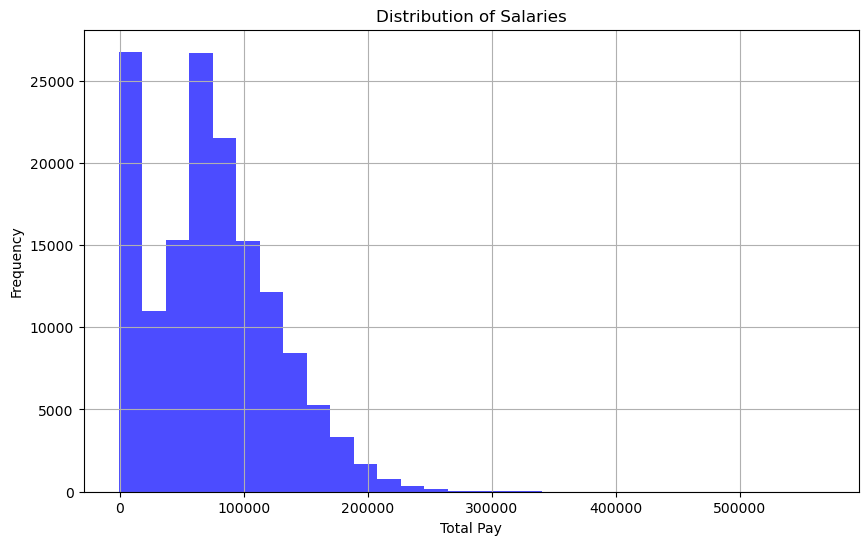

In [14]:
#Distribution of salaries(using histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

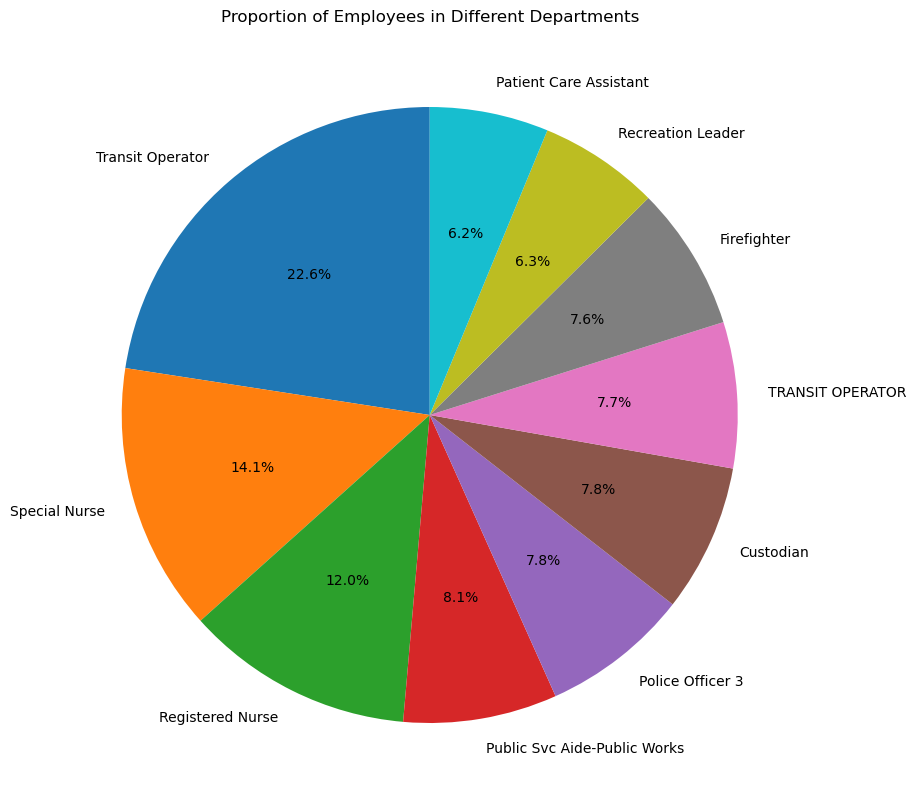

In [15]:
department_counts = df['JobTitle'].value_counts().head(10)

plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()

## 5-Grouped Analysis

In [16]:
grouped_data = df.groupby('JobTitle')['TotalPay'].mean().reset_index()

In [17]:
grouped_data = grouped_data.sort_values(by='TotalPay', ascending=False)

In [18]:
grouped_data.head(10)

,JobTitle,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
466,Chief Investment Officer,339653.700000
474,Chief of Police,329183.646667
475,"Chief, Fire Department",325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
324,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
838,"Gen Mgr, Public Trnsp Dept",297769.413333
206,Asst Chf of Dept (Fire Dept),281763.483889
576,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
621,"Dep Dir for Investments, Ret",278592.545000


## Correlation Analysis

In [19]:
correlation_matrix = df[['TotalPay', 'BasePay']].corr()

C:\Users\amjda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amjda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'TotalPay')

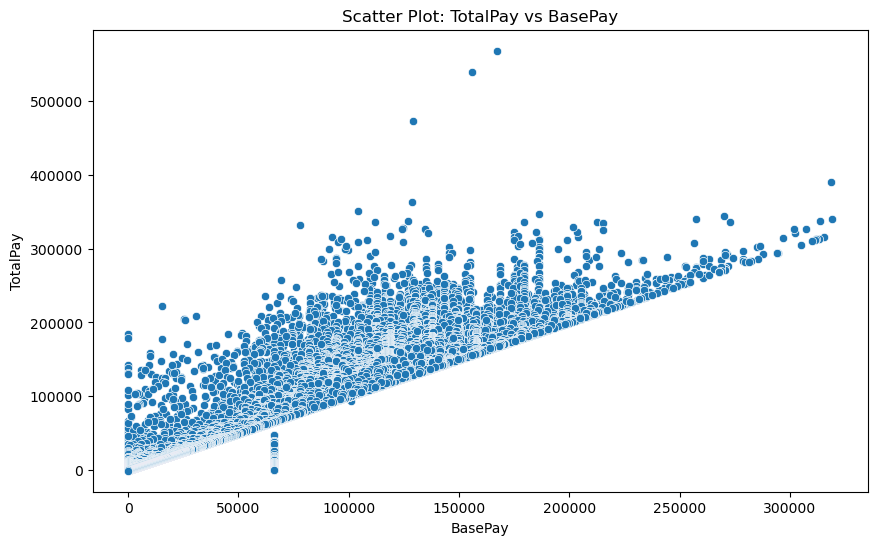

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df)
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')